In [4]:
!pip install pandas openpyxl


Load the datasets using pandas library

In [ ]:
import pandas as pd
dataset=pd.read_csv('/content/Sheet 2-medsqud.csv')
dataset1=pd.read_csv('/content/Sheet 3-medsqud.csv')
dataset2=pd.read_csv('/content/Sheet 4-medsqud.csv')
dataset3=pd.read_csv('/content/Sheet 5-medsqud.csv')
dataset4=pd.read_csv('/content/Sheet 6-medsqud.csv')
dataset5=pd.read_csv('/content/Sheet 7-medsqud.csv')
dataset6=pd.read_csv('/content/Sheet 8-medsqud.csv')
dataset7=pd.read_csv('/content/Sheet 9-medsqud.csv')
print(f"Number of rows for 2: {dataset.shape[0]}")
print(f"Number of columns: {dataset.shape[1]}")
print(f"Number of rows for 3: {dataset1.shape[0]}")
print(f"Number of columns: {dataset1.shape[1]}")
print(f"Number of rows for 4: {dataset2.shape[0]}")
print(f"Number of columns: {dataset2.shape[1]}")
print(f"Number of rows for 5: {dataset3.shape[0]}")
print(f"Number of columns: {dataset3.shape[1]}")
print(f"Number of rows for 6: {dataset4.shape[0]}")
print(f"Number of columns: {dataset4.shape[1]}")
print(f"Number of rows for 7: {dataset5.shape[0]}")
print(f"Number of columns: {dataset5.shape[1]}")
print(f"Number of rows for 8: {dataset6.shape[0]}")
print(f"Number of columns: {dataset6.shape[1]}")
print(f"Number of rows for 9: {dataset7.shape[0]}")
print(f"Number of columns: {dataset7.shape[1]}")


In [8]:
!pip install transformers -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 41.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

Choosing the dataset which has highest number of rows for training and the lowest number of rows for validation

In [2]:
# import os


# # Verify accelerate installation
# import accelerate


# import torch
# from transformers import Trainer, TrainingArguments, GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling
# # Check if CUDA (GPU support) is available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f'Using device: {device}')
# # Load the model and tokenizer
# model = GPT2LMHeadModel.from_pretrained('openai-community/gpt2').to(device)  # Load model on GPU if available
# tokenizer = GPT2Tokenizer.from_pretrained('openai-community/gpt2')

# # Prepare the dataset
# def load_dataset(file_path, tokenizer, block_size=128):
#     dataset = TextDataset(
#         tokenizer=tokenizer,
#         file_path=file_path,
#         block_size=block_size,
#     )
#     return dataset

# train_dataset = load_dataset("/content/Sheet 4-medsqud.csv", tokenizer)
# val_dataset = load_dataset("/content/Sheet 2-medsqud.csv", tokenizer)

# data_collator = DataCollatorForLanguageModeling(
#     tokenizer=tokenizer,
#     mlm=False,
# )

# # Set training arguments
# training_args = TrainingArguments(
#     output_dir="./results",
#     overwrite_output_dir=True,
#     num_train_epochs=5,
#     per_device_train_batch_size=8,  # Increase batch size
#     gradient_accumulation_steps=4,   # Accumulate gradients
#     save_steps=20_000,               # Save less frequently
#     save_total_limit=3,              # Limit total checkpoints
#     fp16=True                        # Enable mixed precision training
# )

# # Initialize Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     data_collator=data_collator,
#     train_dataset=train_dataset,
#     eval_dataset=None
# )

# # Train the model
# trainer.train()

import os

# Verify accelerate installation
import accelerate

import torch
from transformers import Trainer, TrainingArguments, GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling

# Check if CUDA (GPU support) is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the model and tokenizer
model = GPT2LMHeadModel.from_pretrained('openai-community/gpt2').to(device)  # Load model on GPU if available
tokenizer = GPT2Tokenizer.from_pretrained('openai-community/gpt2')

# Prepare the dataset
def load_dataset(file_path, tokenizer, block_size=128):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size,
    )
    return dataset

train_dataset = load_dataset("/content/Sheet 4-medsqud.csv", tokenizer)
val_dataset = load_dataset("/content/Sheet 2-medsqud.csv", tokenizer)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

# Set training arguments
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=8,  # Increase batch size
    gradient_accumulation_steps=4,   # Accumulate gradients
    save_steps=20_000,               # Save less frequently
    save_total_limit=3,              # Limit total checkpoints
    fp16=True,                       # Enable mixed precision training
    evaluation_strategy="epoch",     # Evaluate at the end of each epoch
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=500,               # Log every 500 steps
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,        # Add evaluation dataset
)

# Train the model
trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate(eval_dataset=val_dataset)
print(f"Evaluation results: {eval_results}")

# Save the model and tokenizer
model.save_pretrained("./fine-tuned-model")
tokenizer.save_pretrained("./fine-tuned-model")

Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarni

Epoch,Training Loss,Validation Loss
0,No log,2.296923
1,No log,2.271025
2,No log,2.263554
4,No log,2.259907
5,No log,2.263307
6,No log,2.267569
8,No log,2.271430
9,2.019000,2.273418


Evaluation results: {'eval_loss': 2.2734177112579346, 'eval_runtime': 5.3724, 'eval_samples_per_second': 198.606, 'eval_steps_per_second': 24.942, 'epoch': 9.951219512195122}


('./fine-tuned-model/tokenizer_config.json',
 './fine-tuned-model/special_tokens_map.json',
 './fine-tuned-model/vocab.json',
 './fine-tuned-model/merges.txt',
 './fine-tuned-model/added_tokens.json')

Giving a test prompt to check if model is trained or not...

In [3]:
input_text = "What is Parkinson disease"
inputs = tokenizer(input_text, return_tensors="pt").to(device) # Move inputs to the same device as the model
outputs = model.generate(**inputs)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(response)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


What is Parkinson disease,"   Parkinson's disease is a condition that affects the brain's ability to


The training loss is No Log which indicates that the model shows no training loss in that many steps

Question Answering

In [5]:
import os

# Verify accelerate installation
import accelerate

import torch
from transformers import Trainer, TrainingArguments, GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling

# Check if CUDA (GPU support) is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the model and tokenizer
model = GPT2LMHeadModel.from_pretrained('openai-community/gpt2').to(device)  # Load model on GPU if available
tokenizer = GPT2Tokenizer.from_pretrained('openai-community/gpt2')

# Check if the tokenizer has a pad_token, if not set it to eos_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Prepare the dataset
def load_dataset(file_path, tokenizer, block_size=128):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size,
    )
    return dataset

train_dataset = load_dataset("/content/Sheet 5-medsqud.csv", tokenizer)
val_dataset = load_dataset("/content/Sheet 6-medsqud.csv", tokenizer)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

# Set training arguments
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=16,  # Increase batch size
    gradient_accumulation_steps=4,   # Accumulate gradients
    save_steps=20_000,               # Save less frequently
    save_total_limit=3,              # Limit total checkpoints
    fp16=True,
    learning_rate=1e-5,# Enable mixed precision training
    evaluation_strategy="epoch",     # Evaluate at the end of each epoch
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=1000,
    # Log every 500 steps


)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,        # Add evaluation dataset
)

# Train the model
trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate(eval_dataset=val_dataset)
print(f"Evaluation results: {eval_results}")

# Function to generate a response given an input question
def generate_response(question, model, tokenizer, max_length=200, num_return_sequences=1):
    inputs = tokenizer.encode(question, return_tensors='pt').to(device)
    outputs = model.generate(inputs, max_length=max_length, num_return_sequences=num_return_sequences, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Test the fine-tuned model
input_text = "What is Dementia?"
response = generate_response(input_text, model, tokenizer)
print(response)


Using device: cuda


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
0,No log,2.623462
1,No log,2.482611
2,No log,2.427663
4,No log,2.396048
5,No log,2.388823
6,No log,2.384115
8,No log,2.380532
9,No log,2.379951


The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Evaluation results: {'eval_loss': 2.3799514770507812, 'eval_runtime': 10.1318, 'eval_samples_per_second': 196.708, 'eval_steps_per_second': 24.675, 'epoch': 9.67032967032967}
What is Dementia?

Dementia is a condition that affects the brain, causing changes in the way the brain functions. It can be caused by a variety of conditions, including Alzheimer's disease, Parkinson's disease, and dementia.

What are the symptoms of dementia,"Dementia is a condition that affects the brain, causing changes in the way the brain functions. It can be caused by a variety of conditions, including Alzheimer's disease, Parkinson's disease, and dementia."

What are the symptoms of dementia,"Dementia is a condition that affects the brain, causing changes in the way the brain functions. It can be caused by a variety of conditions, including Alzheimer's disease, Parkinson's disease, and dementia."

What are the symptoms of dementia,"Dementia is a condition that affects the brain, causing changes in the way 

In [6]:
input_text = "What is cancer and what are it's symptoms?"
response = generate_response(input_text, model, tokenizer)
print(response)

What is cancer and what are it's symptoms?
  Cancer is a serious, life-threatening condition that affects the body's immune system. It can affect the way your body functions, including your immune system, your immune system's ability to fight off infections, and your immune system's ability to fight off cancer. It can also affect your immune system's ability to fight off infections.
  What are the symptoms of cancer,"   The symptoms of cancer include a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high temperature, a high


In [7]:
# # You only need to run this once per machine
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U datasets scipy ipywidgets matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [10]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 1632800 || all params: 126072608 || trainable%: 1.2951266939762205


In [11]:
import json
import matplotlib.pyplot as plt

In [12]:
train_checkpoints_data=json.load(open("/content/results/checkpoint-510/trainer_state.json"))


In [13]:
lr = []
loss = []
eval_loss = []
steps=[]
for x in train_checkpoints_data['log_history']:
    try:
        lr.append(x['learning_rate'])
        loss.append(x['loss'])
        steps.append(x['step'])
    except:
        eval_loss.append(x['eval_loss'])

In [14]:
lr

[1.9923076923076926e-05,
 1.9813186813186815e-05,
 1.9703296703296705e-05,
 1.9593406593406594e-05,
 1.9483516483516484e-05,
 1.9373626373626377e-05,
 1.9263736263736266e-05,
 1.9153846153846156e-05,
 1.9043956043956045e-05,
 1.8934065934065935e-05,
 1.8824175824175824e-05,
 1.8714285714285717e-05,
 1.8604395604395607e-05,
 1.8494505494505496e-05,
 1.8384615384615386e-05,
 1.8274725274725275e-05,
 1.8164835164835165e-05,
 1.8054945054945057e-05,
 1.7945054945054947e-05,
 1.7835164835164836e-05,
 1.7725274725274726e-05,
 1.7615384615384615e-05,
 1.7505494505494508e-05,
 1.7395604395604398e-05,
 1.7285714285714287e-05,
 1.7175824175824177e-05,
 1.7065934065934066e-05,
 1.6956043956043956e-05,
 1.684615384615385e-05,
 1.6736263736263738e-05,
 1.6626373626373628e-05,
 1.6516483516483517e-05,
 1.6406593406593406e-05,
 1.62967032967033e-05,
 1.618681318681319e-05,
 1.607692307692308e-05,
 1.5967032967032968e-05,
 1.5857142857142857e-05,
 1.5747252747252747e-05,
 1.563736263736264e-05,
 1.552

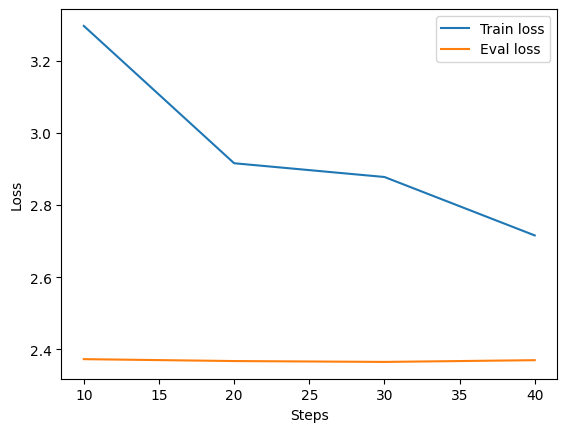

In [16]:
import json
import matplotlib.pyplot as plt

train_checkpoints_data=json.load(open("/content/results/checkpoint-510/trainer_state.json"))

lr = []
loss = []
eval_loss = []
steps=[]
for x in train_checkpoints_data['log_history']:
    lr.append(x.get('learning_rate', None))  # Use get() with a default value to handle missing keys
    loss.append(x.get('loss', None))
    eval_loss.append(x.get('eval_loss', None))  # Append to eval_loss even if 'eval_loss' key is missing
    steps.append(x.get('step', None))

# Remove None values from the lists to ensure they have the same length
steps = [s for s in steps if s is not None]
loss = [l for l in loss if l is not None]
eval_loss = [e for e in eval_loss if e is not None]

# Ensure that 'steps', 'loss', and 'eval_loss' have the same length before plotting
min_length = min(len(steps), len(loss), len(eval_loss))
steps = steps[:min_length]
loss = loss[:min_length]
eval_loss = eval_loss[:min_length]  # Trim eval_loss to match the length

plt.plot(steps, loss, label="Train loss")
plt.plot(steps, eval_loss, label= "Eval loss")
leg= plt.legend()
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()

In [52]:
!pip install flask


In [1]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s

In [7]:
#!pip install gradio

import gradio as gr
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the model and tokenizer
model_name = 'openai-community/gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Check if the tokenizer has a pad_token, if not set it to eos_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Function to generate a response given an input question
def generate_response(question):
    inputs = tokenizer.encode(question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=50, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Define the Gradio interface
iface = gr.Interface(
    fn=generate_response,
    inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
    outputs="text",
    title="GPT-2 Medical Question Answering",
    description="Ask a question and get a response from a fine-tuned GPT-2 model."
)

# Launch the Gradio interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://72122bb625facd94ad.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
